# Notebook for CP 220 Compendium Assignment #1

In [421]:
import pandas as pd, numpy as np, requests, re
from matplotlib import pyplot as plt
pd.set_option("max_columns", 100)

In [360]:
cbp = pd.read_csv('/Users/mapsense-simon/Downloads/cbp16co.txt')
cbp13 = pd.read_csv('cbp13co.txt')

In [27]:
# nine-county Bay Area region
nine_counties = [1, 13, 41, 55, 75, 81, 85, 95, 97]

In [71]:
industries = {
    "11----" : "Agriculture, Forestry, Fishing and Hunting",
    "21----" : "Mining, Quarrying, and Oil and Gas Extraction",
    "22----" : "Utilities",
    "23----" : "Construction",
    "31----" : "Manufacturing",
    "42----" : "Wholesale Trade",
    "44----" : "Retail Trade",
    "48----" : "Transportation and Warehousing",
    "51----" : "Information",
    "52----" : "Finance and Insurance",
    "53----" : "Real Estate and Rental and Leasing",
    "54----" : "Professional, Scientific, and Technical Services",
    "55----" : "Management of Companies and Enterprises",
    "56----" : "Administrative and Support and Waste Management and Remediation Services",
    "61----" : "Education Services",
    "62----" : "Health Care and Social Assistance",
    "71----" : "Arts, Entertainment, and Recreation",
    "72----" : "Accomodation and Food Services",
    "81----" : "Other Services (except Public Administration)",
    "92----" : "Public Administration",
    "99----" : "Unclassified"
}

In [30]:
# dataframe for just the nine-county Bay Area region
df = cbp[(cbp["fipstate"] == 6) & (cbp['fipscty'].isin(nine_counties))].reset_index()

In [90]:
# dropped all rows except two-digit NAICS codes

# for nine-county Bay Area
two_digit_naics = df[(df.naics.str[2:] == "----") & (df.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
two_digit_naics.head()

# for US as a whole
national_two_digit_naics = cbp[(cbp.naics.str[2:] == "----") & (cbp.naics.str[:2] != "--")]

In [91]:
# create an array of all the two-digit NAICS codes
two_digit_naics_codes = cbp[(cbp.naics.str[2:] == "----") & (cbp.naics.str[:2] != "--")]['naics'].unique()

## LOCATION QUOTIENT
<ul>
    <li>calculate location quotients to describe regional specialization</li>
    <li>currently handles two geographies; will be updated to take more</li>
    </ul>

In [527]:
# 2016 data

result_list = []
regional_employment_by_industry_list = []
national_employment_by_industry_list = []

# get total number of employees by geography
regional_employees = sum(two_digit_naics['emp'])
national_employees = sum(national_two_digit_naics['emp'])

# iterate through two-digit industries
for naics in two_digit_naics_codes:
    
    # calculate number of employees by industry by geography
    regional_industy_employees = sum(two_digit_naics[two_digit_naics['naics'] == naics]['emp'])
    national_industry_employees = sum(national_two_digit_naics[national_two_digit_naics['naics'] == naics]['emp'])
    
    # calculate & save location quotient
    lq = (regional_industy_employees/regional_employees)/(national_industry_employees/national_employees)
    result_list.append(pd.DataFrame(data=[[industries[naics], round(lq, 2)]], columns=['Industry', 'Location Quotient']))

    
    # save number of regional employees by industry for use in other analyses
    regional_employment_by_industry_list.append(pd.DataFrame(data=[[industries[naics], regional_industy_employees]], columns=['Industry', 'Employees']))
    national_employment_by_industry_list.append(pd.DataFrame(data=[[industries[naics], national_industry_employees]], columns=['Industry', 'Employees']))
    
# create dataframe of industries and location quotients
# export dataframe as CSV
lq2016 = pd.concat(result_list, ignore_index=True)
lq2016.to_csv("LQ_2016_BAvsUSA.csv")

In [528]:
# 2013 data

result_list13 = []
regional_employment_by_industry_list13 = []
national_employment_by_industry_list13 = []

# get total number of employees by geography
regional_employees13 = sum(two_digit_naics13['emp'])
national_employees13 = sum(national_two_digit_naics13['emp'])

# iterate through two-digit industries
for naics in two_digit_naics_codes:
    
    # calculate number of employees by industry by geography
    regional_industy_employees13 = sum(two_digit_naics13[two_digit_naics13['naics'] == naics]['emp'])
    national_industry_employees13 = sum(national_two_digit_naics13[national_two_digit_naics13['naics'] == naics]['emp'])
    
    # calculate & save location quotient
    lq = (regional_industy_employees13/regional_employees13)/(national_industry_employees13/national_employees13)
    result_list13.append(pd.DataFrame(data=[[industries[naics], round(lq, 2)]], columns=['Industry', 'Location Quotient']))

    
    # save number of regional employees by industry for use in other analyses
    regional_employment_by_industry_list13.append(pd.DataFrame(data=[[industries[naics], regional_industy_employees13]], columns=['Industry', 'Employees']))
    national_employment_by_industry_list13.append(pd.DataFrame(data=[[industries[naics], national_industry_employees13]], columns=['Industry', 'Employees']))
    
# create dataframe of industries and location quotients
# export dataframe as CSV
lq2013 = pd.concat(result_list13, ignore_index=True)
lq2013.to_csv("LQ_2013_BAvsUSA.csv")

In [512]:
location_quotients = lq2013.merge(lq2016, on="Industry", suffixes=[" 2013"," 2016"])
location_quotients['Change'] = location_quotients['Location Quotient 2016'] - location_quotients['Location Quotient 2013']

location_quotients.to_csv("LocationQuotients_BayArea_vs_USA_2013_2016.csv")

location_quotients

,Industry,Location Quotient 2013,Location Quotient 2016,Change
0,"Agriculture, Forestry, Fishing and Hunting",0.49,0.48,-0.01
1,"Mining, Quarrying, and Oil and Gas Extraction",0.03,0.07,0.04
2,Utilities,1.26,0.46,-0.80
3,Construction,1.04,1.05,0.01
4,Manufacturing,0.73,0.78,0.05
5,Wholesale Trade,1.29,1.20,-0.09
6,Retail Trade,0.82,0.81,-0.01
7,Transportation and Warehousing,0.77,0.74,-0.03
8,Information,2.47,2.85,0.38
9,Finance and Insurance,0.95,0.90,-0.05


<Figure size 432x288 with 0 Axes>

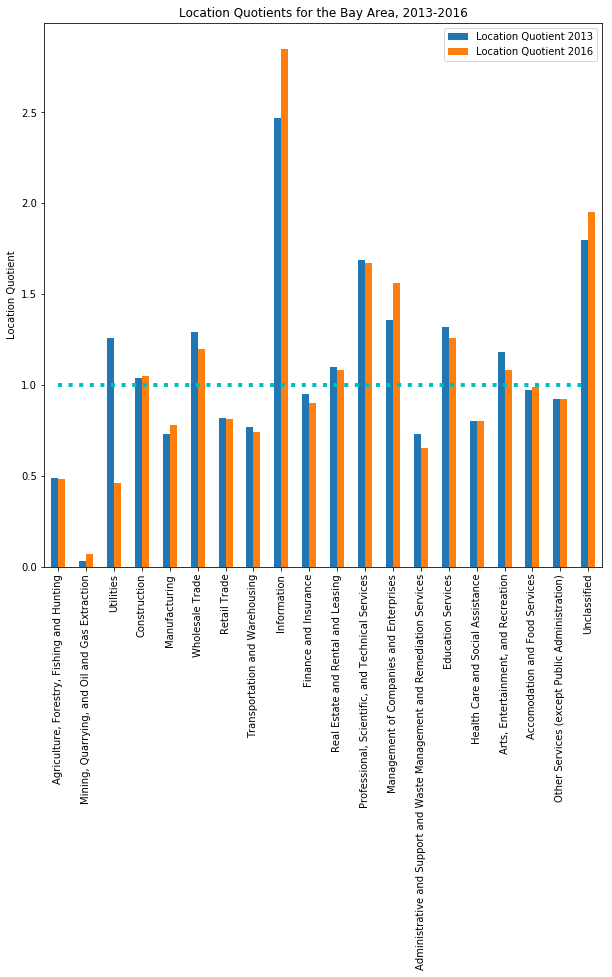

In [518]:
# visualize location quotients!

plt.clf()

location_quotients.iloc[:][["Location Quotient 2013", "Location Quotient 2016"]].plot(kind="bar", figsize=(10,10))

plt.xticks(np.arange(20), location_quotients['Industry'])
plt.plot(np.arange(20), np.ones(20), 'c:', linewidth=4)

plt.title("Location Quotients for the Bay Area, 2013-2016")
plt.ylabel("Location Quotient")

plt.savefig("LQ_compare.png")

plt.show()

Running again for other years. Attempted thru API, but TBD.

In [348]:
year = 2013
variables = ["EMP"] 
geo = "county:*&in=state:06"
naics_year = 2012
naics_industry_code = 312

api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), str(naics_industry_code))
print(api_query)

In [359]:
dfs = []

for code in industries.keys():
    shortcode = code[:2]
    api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), shortcode)
    
    r = requests.get(api_query)

    print(code, industries[code], r)

    values = []

    split_response = r.text[1:-1].split('\n')
    num_lines = len(split_response)

    for i in range(num_lines):
        s = split_response[i][1:-1]
        t = re.findall(r'(?:[^\s,"]|"(?:\\.|[^"])*")+', s)
        t = [x[1:-1] if x[-1] == '"' else x[1:-2] for x in t]
        values.append(t)
    header = values[0]
    values = values[1:]

    dfs.append(pd.DataFrame(data=values, columns=header))

cbp_data = pd.concat(dfs, ignore_index=True)


11---- Agriculture, Forestry, Fishing and Hunting <Response [200]>
21---- Mining, Quarrying, and Oil and Gas Extraction <Response [200]>
22---- Utilities <Response [200]>
23---- Construction <Response [200]>
31---- Manufacturing <Response [204]>
42---- Wholesale Trade <Response [200]>
44---- Retail Trade <Response [204]>
48---- Transportation and Warehousing <Response [204]>
51---- Information <Response [200]>
52---- Finance and Insurance <Response [200]>
53---- Real Estate and Rental and Leasing <Response [200]>
54---- Professional, Scientific, and Technical Services <Response [200]>
55---- Management of Companies and Enterprises <Response [200]>
56---- Administrative and Support and Waste Management and Remediation Services <Response [200]>
61---- Education Services <Response [200]>
62---- Health Care and Social Assistance <Response [200]>
71---- Arts, Entertainment, and Recreation <Response [200]>
72---- Accomodation and Food Services <Response [200]>
81---- Other Services (except P

## DIVERSITY INDEX
<ul>
    <li> generate one statistic describing the industrial diversity of a geography </li>
    </ul>

In [520]:
# rei is regional employment by industry
rei = pd.concat(regional_employment_by_industry_list, ignore_index=True)

In [82]:
rei['Share'] = [x/regional_employees for x in list(rei['Employees'])]

In [84]:
rei['Log_Share'] = [np.log(x) for x in list(rei['Share'])]
rei

,Industry,Employees,Share,Log_Share
0,"Agriculture, Forestry, Fishing and Hunting",1906,0.000553,-7.499828
1,"Mining, Quarrying, and Oil and Gas Extraction",948,0.000275,-8.198235
2,Utilities,4983,0.001446,-6.538802
3,Construction,181446,0.052661,-2.943876
4,Manufacturing,245155,0.071152,-2.642944
5,Wholesale Trade,201227,0.058402,-2.840401
6,Retail Trade,352278,0.102242,-2.280414
7,Transportation and Warehousing,95525,0.027724,-3.585446
8,Information,267460,0.077625,-2.555864
9,Finance and Insurance,155489,0.045128,-3.098259


In [89]:
num_industries = len(rei)
diversity_index = -(sum(rei['Share'] * rei['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

0.88

Run the same steps at the national level.

In [531]:
nei = pd.concat(national_employment_by_industry_list, ignore_index=True)
nei['Share'] = [x/national_employees for x in list(nei['Employees'])]
nei['Log_Share'] = [np.log(x) for x in list(nei['Share'])]
nei

,Industry,Employees,Share,Log_Share
0,"Agriculture, Forestry, Fishing and Hunting",145226,0.001154,-6.764360
1,"Mining, Quarrying, and Oil and Gas Extraction",532262,0.004230,-5.465515
2,Utilities,396968,0.003155,-5.758795
3,Construction,6300302,0.050072,-2.994298
4,Manufacturing,11514786,0.091514,-2.391264
5,Wholesale Trade,6102940,0.048503,-3.026125
6,Retail Trade,15959352,0.126837,-2.064851
7,Transportation and Warehousing,4687105,0.037251,-3.290081
8,Information,3424640,0.027217,-3.603900
9,Finance and Insurance,6334709,0.050345,-2.988852


In [533]:
# national 2016 diversity index

num_industries = len(nei)
diversity_index = -(sum(nei['Share'] * nei['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

0.87

Now run the region again for 2013.

In [534]:
rei13 = pd.concat(regional_employment_by_industry_list13, ignore_index=True)
rei13['Share'] = [x/regional_employees13 for x in list(rei13['Employees'])]
rei13['Log_Share'] = [np.log(x) for x in list(rei13['Share'])]
rei13

,Industry,Employees,Share,Log_Share
0,"Agriculture, Forestry, Fishing and Hunting",1420,0.000458,-7.689219
1,"Mining, Quarrying, and Oil and Gas Extraction",537,0.000173,-8.661633
2,Utilities,6483,0.002090,-6.170692
3,Construction,151943,0.048979,-3.016370
4,Manufacturing,210586,0.067882,-2.689981
5,Wholesale Trade,203856,0.065713,-2.722462
6,Retail Trade,332386,0.107144,-2.233579
7,Transportation and Warehousing,84733,0.027314,-3.600370
8,Information,207259,0.066810,-2.705906
9,Finance and Insurance,150921,0.048649,-3.023119


In [535]:
num_industries = len(rei13)
diversity_index = -(sum(rei13['Share'] * rei13['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

0.88

And again for the nation in 2013.

In [536]:
nei13 = pd.concat(national_employment_by_industry_list13, ignore_index=True)
nei13['Share'] = [x/national_employees for x in list(nei13['Employees'])]
nei13['Log_Share'] = [np.log(x) for x in list(nei13['Share'])]
nei13

,Industry,Employees,Share,Log_Share
0,"Agriculture, Forestry, Fishing and Hunting",106307,0.000845,-7.076320
1,"Mining, Quarrying, and Oil and Gas Extraction",607017,0.004824,-5.334094
2,Utilities,189513,0.001506,-6.498194
3,Construction,5367955,0.042662,-3.154449
4,Manufacturing,10679888,0.084879,-2.466534
5,Wholesale Trade,5816403,0.046226,-3.074214
6,Retail Trade,14994579,0.119170,-2.127207
7,Transportation and Warehousing,4082438,0.032445,-3.428202
8,Information,3093602,0.024586,-3.705560
9,Finance and Insurance,5887948,0.046795,-3.061988


In [537]:
# national 2013 diversity index

num_industries = len(nei13)
diversity_index = -(sum(nei13['Share'] * nei13['Log_Share'])/np.log(num_industries))
round(diversity_index, 2)

0.82

In [541]:
# save to a DF
diversity_index_results = pd.DataFrame(data=[["Bay Area", 0.88, 0.88], ["United States", 0.82, 0.87]], columns=["Geography", "Diversity Index 2013", "Diversity Index 2016"])

diversity_index_results.to_csv("DiversityIndex_BayArea_vs_US_2013-2013.csv")

diversity_index_results

,Geography,Diversity Index 2013,Diversity Index 2016
0,Bay Area,0.88,0.88
1,United States,0.82,0.87


## SHIFT-SHARE ANALYSIS

In [419]:
# load CBP data from 2013

# dataframe for just the nine-county Bay Area region
df13 = cbp13[(cbp13["fipstate"] == 6) & (cbp13['fipscty'].isin(nine_counties))].reset_index()

# dropped all rows except two-digit NAICS codes

# for nine-county Bay Area
two_digit_naics13 = df13[(df13.naics.str[2:] == "----") & (df13.naics.str[:2] != "--")].sort_values(["fipscty", "naics"]).reset_index()
two_digit_naics13.head()

# for US as a whole
national_two_digit_naics13 = cbp13[(cbp13.naics.str[2:] == "----") & (cbp13.naics.str[:2] != "--")].reset_index()


# create an array of all the two-digit NAICS codes
two_digit_naics_codes13 = cbp13[(cbp13.naics.str[2:] == "----") & (cbp13.naics.str[:2] != "--")]['naics'].unique()



In [371]:
# identify columns to keep for pending shift-share analysis

cols2use = ["fipscty", "naics", "emp"]

# merge 2013 and 2016 data for both the Bay Area and the U.S.

bay_area_emp = two_digit_naics13[cols2use].merge(two_digit_naics[cols2use], left_on=['fipscty','naics'], right_on=['fipscty', 'naics'], suffixes=["_13", "_16"])
usa_emp = national_two_digit_naics13[cols2use].merge(national_two_digit_naics[cols2use], left_on=['fipscty','naics'], right_on=['fipscty', 'naics'], suffixes=["_13", "_16"])



In [410]:
# clean and aggregate employment data

df2be = []

for industry_code in list(bay_area_emp['naics'].unique()):
    df2be.append([industry_code, sum(bay_area_emp[bay_area_emp['naics'] == industry_code]['emp_13']), sum(bay_area_emp[bay_area_emp['naics'] == industry_code]['emp_16'])])

bay_area_emp_clean = pd.DataFrame(data=df2be, columns=['naics', 'emp13', 'emp16'])

df2be = []

for industry_code in list(usa_emp['naics'].unique()):
    df2be.append([industry_code, sum(usa_emp[usa_emp['naics'] == industry_code]['emp_13']), sum(usa_emp[usa_emp['naics'] == industry_code]['emp_16'])])

usa_emp_clean = pd.DataFrame(data=df2be, columns=['naics', 'emp13', 'emp16'])

bay_area_usa_emp = bay_area_emp_clean.merge(usa_emp_clean, left_on="naics", right_on="naics", suffixes=["_bay", "_usa"])

bay_area_usa_emp['industry'] = [industries[x] for x in bay_area_usa_emp['naics']]

bay_area_usa_emp = bay_area_usa_emp[['industry', 'naics','emp13_bay', 'emp16_bay','emp13_usa', 'emp16_usa']]
bay_area_usa_emp.to_csv("BayArea_USA_employment_2013_2016.csv")


In [420]:
# new dataframe for shift-share analysis (ss)
ss = bay_area_usa_emp

# SHIFT-SHARE ANALYSIS

# national growth share
ss["natl_growth_rate"] = (sum(ss['emp16_usa']) - sum(ss['emp13_usa'])) / sum(ss['emp13_usa'])
ss["natl_growth_share"] = ss['emp13_bay'] * ss['natl_growth_rate']

# industry mix
ss["natl_industry_growth_rate"] = (ss['emp16_usa'] - ss['emp13_usa']) / ss['emp13_usa']
ss['industry_mix'] = ss['emp13_bay'] * (ss['natl_industry_growth_rate'] - ss['natl_growth_rate'])

# local competitiveness
ss['local_industry_growth_rate'] = (ss['emp16_bay'] - ss['emp13_bay']) / ss['emp13_bay']
ss['local_competitiveness'] = ss['emp13_bay'] * (ss['local_industry_growth_rate'] - ss['natl_industry_growth_rate'])

# change in local jobs
ss['local_emp_delta'] = ss['emp16_bay'] - ss['emp13_bay']

ss.to_csv("Shift-Share_BayArea2USA_2013-2016.csv")

ss.head()


,industry,naics,emp13_bay,emp16_bay,emp13_usa,emp16_usa,natl_growth_rate,natl_growth_share,natl_industry_growth_rate,industry_mix,local_industry_growth_rate,local_competitiveness,local_emp_delta
0,"Agriculture, Forestry, Fishing and Hunting",11----,1420,1906,3259777,4326453,0.106595,151.364536,0.327224,313.292991,0.342254,21.342473,486
1,"Mining, Quarrying, and Oil and Gas Extraction",21----,537,948,14032970,12059866,0.106595,57.241378,-0.140605,-132.746196,0.765363,486.504818,411
2,Utilities,22----,6483,4983,5330120,11588404,0.106595,691.053725,1.174136,6920.867802,-0.231374,-9111.921527,-1500
3,Construction,23----,151943,181446,172718000,203881642,0.106595,16196.325189,0.180431,11218.867532,0.194171,2087.807279,29503
4,Manufacturing,31----,210586,245155,332784863,356779559,0.106595,22447.360762,0.072103,-7263.535974,0.164156,19385.175212,34569


In [418]:
ss_results = ss[['industry','emp13_bay', 'emp16_bay','local_emp_delta', 'natl_growth_share', 'industry_mix', 'local_competitiveness']]

ss_results['explained_local_emp_delta'] = ss_results['natl_growth_share'] + ss_results['industry_mix'] + ss_results['local_competitiveness']
ss_results['unexplained_local_emp_delta'] = round(ss_results['local_emp_delta'] - ss_results['explained_local_emp_delta'],2)

ss_results


/Users/mapsense-simon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mapsense-simon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,industry,emp13_bay,emp16_bay,local_emp_delta,natl_growth_share,industry_mix,local_competitiveness,explained_local_emp_delta,unexplained_local_emp_delta
0,"Agriculture, Forestry, Fishing and Hunting",1420,1906,486,151.364536,313.292991,21.342473,486.0,0.0
1,"Mining, Quarrying, and Oil and Gas Extraction",537,948,411,57.241378,-132.746196,486.504818,411.0,0.0
2,Utilities,6483,4983,-1500,691.053725,6920.867802,-9111.921527,-1500.0,0.0
3,Construction,151943,181446,29503,16196.325189,11218.867532,2087.807279,29503.0,0.0
4,Manufacturing,210586,245155,34569,22447.360762,-7263.535974,19385.175212,34569.0,0.0
5,Wholesale Trade,203856,201227,-2629,21729.978135,-11829.046976,-12529.931159,-2629.0,0.0
6,Retail Trade,332386,352278,19892,35430.600583,-14473.048452,-1065.552131,19892.0,0.0
7,Transportation and Warehousing,84733,95525,10792,9032.092444,3660.725611,-1900.818056,10792.0,0.0
8,Information,207259,267460,60201,22092.720049,-243.981793,38352.261744,60201.0,0.0
9,Finance and Insurance,150921,155489,4568,16087.385361,-3772.211844,-7747.173517,4568.0,-0.0


([<matplotlib.axis.XTick at 0x127587d68>,
 <a list of 20 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

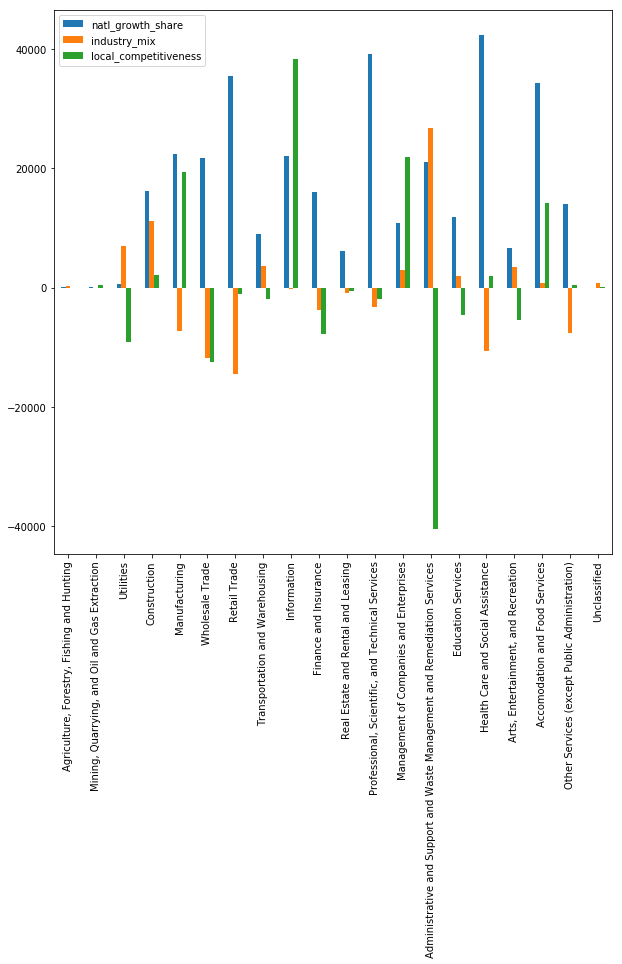

In [474]:
# quick pass as visualizing with a bar chart

plt.clf()

ss_results.iloc[:][["natl_growth_share", "industry_mix", "local_competitiveness"]].plot(kind="bar", figsize=(10,10))

plt.xticks(np.arange(len(ss_results)),list(ss_results['industry']), rotation=90)

# plt.savefig('test.png')

## API experimentation

lookup data dictionaries for information stored in codes

In [275]:
# EMPSZES attribute --> employment size of establishment
# https://api.census.gov/data/2016/cbp/variables/EMPSZES.json

empszes_lookup_api = requests.get("https://api.census.gov/data/2016/cbp/variables/EMPSZES.json")
empszes = empszes_lookup_api.json()['values']['item']

del empszes_lookup_api

Main data query

In [339]:
year = 2016
variables = ["ESTAB", "EMPSZES"] 
geo = "county:*&in=state:06"
naics_year = 2012
naics_industry_code = 312

api_query = "https://api.census.gov/data/%s/cbp?get=%s&for=%s&NAICS%s=%s" % (year, ','.join(variables), geo, str(naics_year), str(naics_industry_code))





In [340]:
r = requests.get(api_query)

print(r)

values = []

split_response = r.text[1:-1].split('\n')
num_lines = len(split_response)

for i in range(num_lines):
    s = split_response[i][1:-1]
    t = re.findall(r'(?:[^\s,"]|"(?:\\.|[^"])*")+', s)
    t = [x[1:-1] if x[-1] == '"' else x[1:-2] for x in t]
    values.append(t)
header = values[0]
values = values[1:]

testDF = pd.DataFrame(data=values, columns=header)
print(len(testDF), "rows")
testDF.head()

<Response [200]>
510 rows


,ESTAB,EMPSZES,NAICS2012,state,county
0,79,001,312,06,001
1,30,212,312,06,001
2,14,220,312,06,001
3,13,230,312,06,001
4,12,241,312,06,001


In [341]:
testDF['EMPSIZES_TEXT'] = [empszes[x] for x in testDF['EMPSZES']]
testDF.head()

,ESTAB,EMPSZES,NAICS2012,state,county,EMPSIZES_TEXT
0,79,001,312,06,001,All establishments
1,30,212,312,06,001,Establishments with 1 to 4 employees
2,14,220,312,06,001,Establishments with 5 to 9 employees
3,13,230,312,06,001,Establishments with 10 to 19 employees
4,12,241,312,06,001,Establishments with 20 to 49 employees


In [347]:
testDF[testDF['county'].isin([str(x).zfill(3) for x in nine_counties])]

,ESTAB,EMPSZES,NAICS2012,state,county,EMPSIZES_TEXT
0,79,001,312,06,001,All establishments
1,30,212,312,06,001,Establishments with 1 to 4 employees
2,14,220,312,06,001,Establishments with 5 to 9 employees
3,13,230,312,06,001,Establishments with 10 to 19 employees
4,12,241,312,06,001,Establishments with 20 to 49 employees
5,6,242,312,06,001,Establishments with 50 to 99 employees
6,3,251,312,06,001,Establishments with 100 to 249 employees
7,1,252,312,06,001,Establishments with 250 to 499 employees
8,0,254,312,06,001,Establishments with 500 to 999 employees
9,0,260,312,06,001,"Establishments with 1,000 employees or more"


In [345]:
"1".zfill(2)

'01'

In [335]:
# Industry, Establishments, Employees

for county in testDF['county'].unique():
    for empsize in testDF['EMPSIZES_TEXT'].unique():
        tdf = testDF[(testDF['county'] == county) & (testDF['EMPSIZES_TEXT']== empsize)]
        
        
            
            #print([county, str(naics_industry_code)])

In [336]:
tdf

,EMP,EMPSZES,NAICS2012,state,county,EMPSIZES_TEXT
589,0,260,72,06,115,"Establishments with 1,000 employees or more"


## Convert NAICS crosswalks into a lookup dataframe
<ul>
    <li>This DataFrame, named <i>crosswalk</i> provides lookup information for NAICS codes across time</li>
    <li>Future versions will take into acount SIC codes as well</li>
</ul>

In [170]:
crosswalk17_12 = pd.read_excel('2017_to_2012_NAICS.xlsx', skiprows=[0,1])
crosswalk12_07 = pd.read_excel('2007_to_2012_NAICS.xls', skiprows=[0,1])
crosswalk07_02 = pd.read_excel('2007_to_2002_NAICS.xls', skiprows=[0,1])
crosswalk02_97 = pd.read_excel('2002_NAICS_to_1997_NAICS.xls', sheet_name="Concordance 23 US NoD")

In [172]:
crosswalk = crosswalk17_12[['2017 NAICS Title','2017 NAICS Code', '2012 NAICS Code', ]]

# merge 2007 data
crosswalk = crosswalk.merge(right=crosswalk12_07[["2012 NAICS Code", "2007 NAICS Code"]], left_on="2012 NAICS Code", right_on="2012 NAICS Code", )

# merge 2002 data
crosswalk = crosswalk.merge(right=crosswalk07_02[["2007 NAICS Code", "2002 NAICS Code"]], left_on="2007 NAICS Code", right_on="2007 NAICS Code", )

# merge 1997 data
crosswalk = crosswalk.merge(right=crosswalk02_97[["NAICS02", "NAICS97"]], left_on="2002 NAICS Code", right_on="NAICS02", )

# clean up output
crosswalk['1997 NAICS Code'] = [int(x) for x in list(crosswalk['NAICS97'])]
crosswalk.drop(["NAICS02", "NAICS97"], axis=1, inplace=True)

del crosswalk17_12, crosswalk12_07, crosswalk07_02, crosswalk02_97

crosswalk.head()



,2017 NAICS Title,2017 NAICS Code,2012 NAICS Code,2007 NAICS Code,2002 NAICS Code,1997 NAICS Code
0,Soybean Farming,111110,111110,111110,111110,111110
1,Oilseed (except Soybean) Farming,111120,111120,111120,111120,111120
2,Dry Pea and Bean Farming,111130,111130,111130,111130,111130
3,Wheat Farming,111140,111140,111140,111140,111140
4,Corn Farming,111150,111150,111150,111150,111150


In [324]:
crosswalk.to_csv("NAICS_Crosswalk_1997-2017.csv")